In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib 
matplotlib.style.use('ggplot')

In [128]:
df = pd.read_excel('Global Terrorism Index 2023.xlsx')
df.head()

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso3c       1793 non-null   object 
 1   Country     1793 non-null   object 
 2   Rank        1793 non-null   int64  
 3   Score       1793 non-null   float64
 4   Incidents   1793 non-null   int64  
 5   Fatalities  1793 non-null   int64  
 6   Injuries    1793 non-null   int64  
 7   Hostages    1793 non-null   int64  
 8   Year        1793 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 126.2+ KB


In [130]:
df.isnull().sum()

iso3c         0
Country       0
Rank          0
Score         0
Incidents     0
Fatalities    0
Injuries      0
Hostages      0
Year          0
dtype: int64

In [131]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,1793.0,71.691578,35.235705,1.0,41.0,82.000000,106.000000,112.0
Score,1793.0,2.442817,2.654876,0.0,0.0,1.534965,4.419243,10.0
Incidents,1793.0,26.699944,109.500965,0.0,0.0,0.000000,4.000000,1673.0
Fatalities,1793.0,53.537646,253.912698,0.0,0.0,0.000000,2.000000,4514.0
Injuries,1793.0,74.588957,415.669549,0.0,0.0,0.000000,4.000000,9479.0
Hostages,1793.0,10.149470,82.306937,0.0,0.0,0.000000,0.000000,2727.0
Year,1793.0,2017.000000,3.163160,2012.0,2014.0,2017.000000,2020.000000,2022.0


In [132]:
df['Year'].value_counts()

Year
2012    163
2013    163
2014    163
2015    163
2016    163
2017    163
2018    163
2019    163
2020    163
2021    163
2022    163
Name: count, dtype: int64

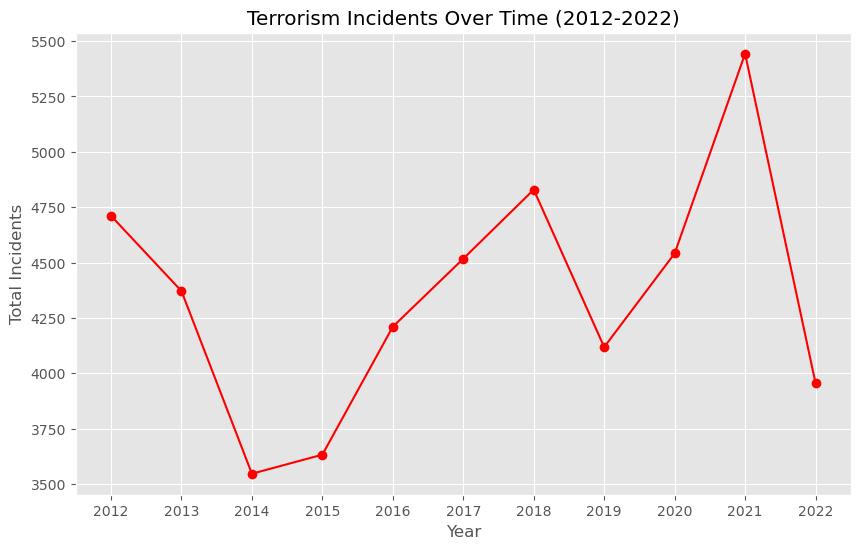

In [133]:
yearly_totals = df.groupby('Year')['Incidents'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Year'], yearly_totals['Incidents'], marker='o', linestyle='-', color='r')
plt.title('Terrorism Incidents Over Time (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.xticks(yearly_totals['Year'])
plt.show()

In [134]:
ax = df.groupby('Country')['Incidents'].sum().reset_index()
ax.head()

,Country,Incidents
0,Afghanistan,4443
1,Albania,0
2,Algeria,111
3,Angola,3
4,Argentina,35


In [135]:
top_5 = ax.sort_values(by='Incidents', ascending=False).head(5)
top_5

,Country,Incidents
66,Iraq,11183
0,Afghanistan,4443
109,Pakistan,3358
130,Somalia,2951
63,India,2872


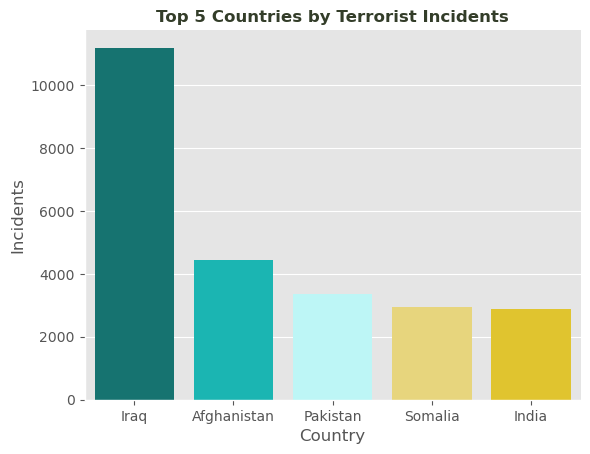

In [136]:
ax = sns.barplot(data=top_5, x='Country', y='Incidents', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Countries by Terrorist Incidents', fontsize=12, weight=600, color='#333d29')
sns.despine()
plt.show()

In [137]:
ax = df.groupby('Country')['Score'].mean().reset_index()
ax.head()

,Country,Score
0,Afghanistan,8.955801
1,Albania,0.141957
2,Algeria,5.288526
3,Angola,1.065264
4,Argentina,2.507681


In [138]:
top_5 = ax.sort_values(by='Score', ascending=False).head(5)
top_5.head()

,Country,Score
66,Iraq,9.333527
0,Afghanistan,8.955801
109,Pakistan,8.508407
105,Nigeria,8.503431
130,Somalia,8.246688


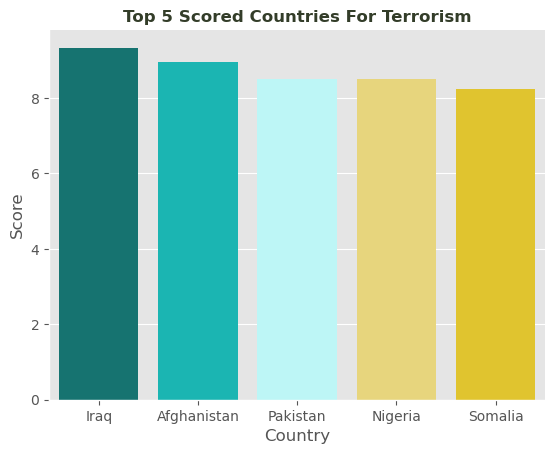

In [139]:
ax = sns.barplot(data=top_5, x='Country', y='Score', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])
ax.set_title('Top 5 Scored Countries For Terrorism', fontsize=12, weight=600, color='#333d29')
sns.despine()
plt.show()

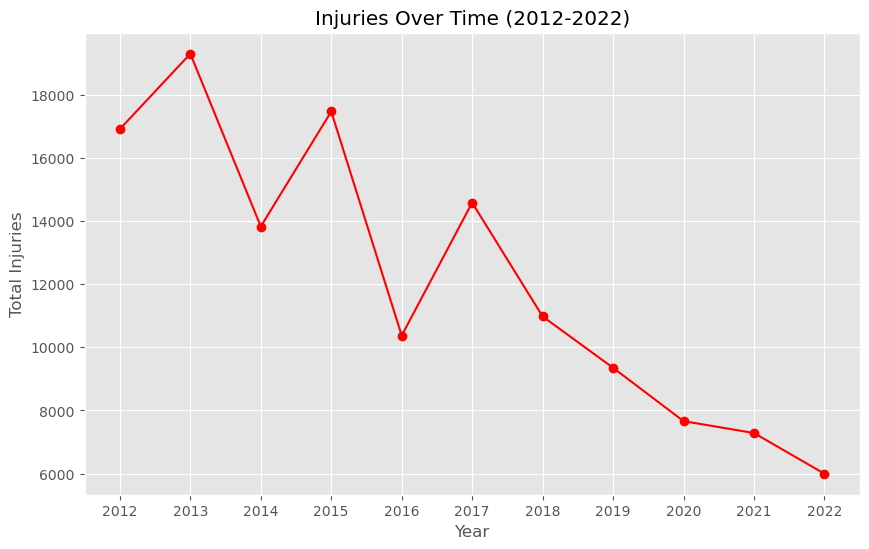

In [140]:
yearly_totals = df.groupby('Year')['Injuries'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Year'], yearly_totals['Injuries'], marker='o', linestyle='-', color='r')
plt.title('Injuries Over Time (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Injuries')
plt.xticks(yearly_totals['Year'])
plt.show()

In [141]:
ax_fatalities = df.groupby('Country')['Fatalities'].sum().reset_index()
top_5_fatalities = ax_fatalities.sort_values(by='Fatalities', ascending=False).head(5)

ax_injuries = df.groupby('Country')['Injuries'].sum().reset_index()
top_5_injuries = ax_injuries.sort_values(by='Injuries', ascending=False).head(5)

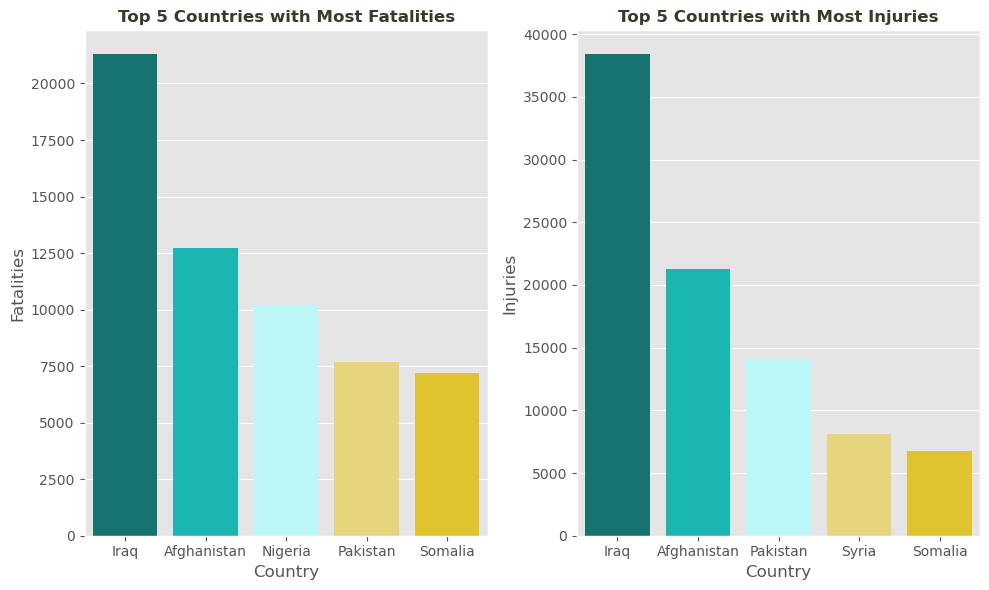

In [142]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))

sns.barplot(data=top_5_fatalities, x='Country', y='Fatalities', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'], ax=axs[0])
axs[0].set_title('Top 5 Countries with Most Fatalities', fontsize=12, weight=600, color='#333d29')


sns.barplot(data=top_5_injuries, x='Country', y='Injuries', palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'], ax=axs[1])
axs[1].set_title('Top 5 Countries with Most Injuries', fontsize=12, weight=600, color='#333d29')


plt.tight_layout()

plt.show()

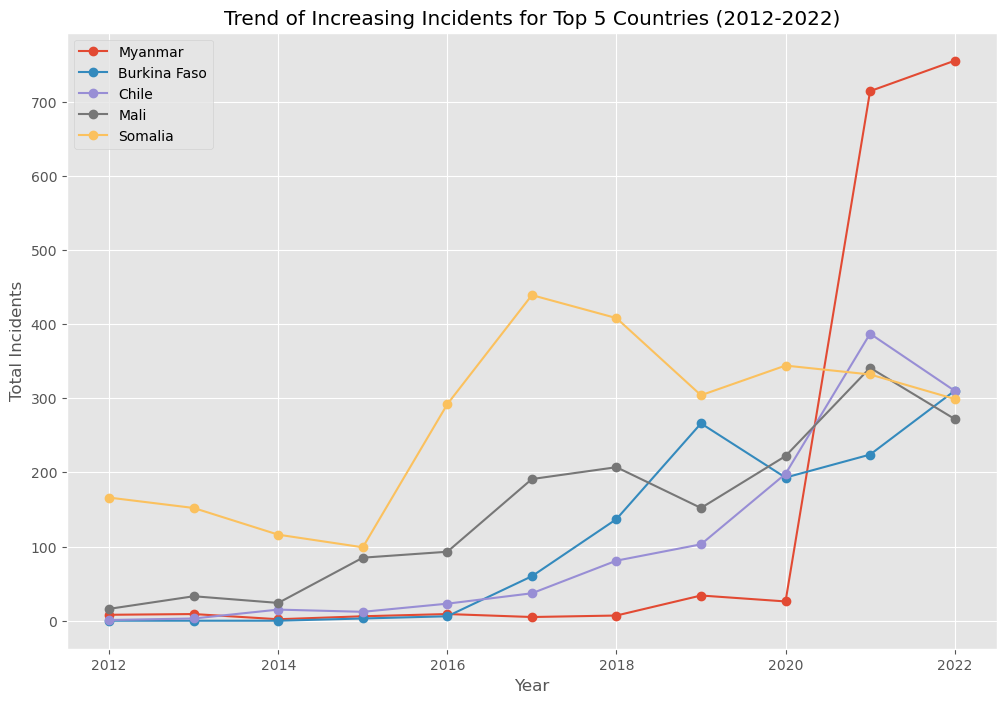

In [143]:
df['Year'] = df['Year'].astype(int)

# Calculate the increase in incidents for each country from 2012 to 2022
increase = pivot_table[2022] - pivot_table[2012]

# Sort countries based on the increase in incidents in descending order
top_countries_increase = increase.sort_values(ascending=False).head(5).index

# Filter the data for the top 5 countries with the greatest increase
top_countries_increase_data = pivot_table.loc[top_countries_increase]

# Create a line chart to visualize the trend of increasing incidents
plt.figure(figsize=(12, 8))

for country in top_countries_increase_data.index:
    plt.plot(top_countries_increase_data.columns, top_countries_increase_data.loc[country], marker='o', linestyle='-', label=country)

plt.title('Trend of Increasing Incidents for Top 5 Countries (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(loc='upper left')
plt.grid(True)

plt.show()

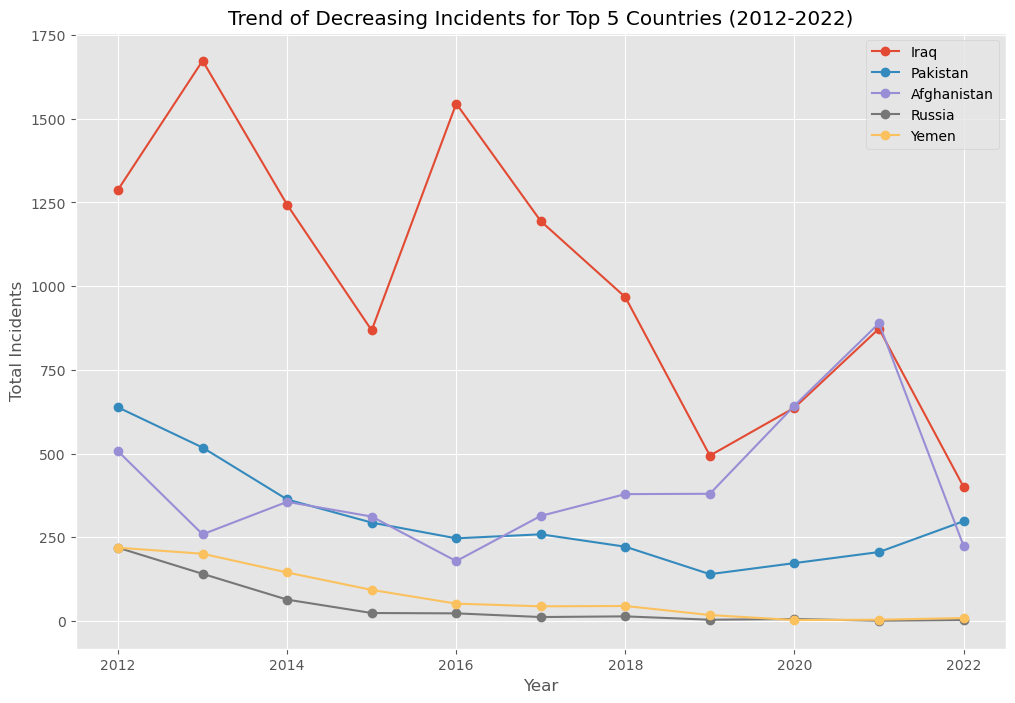

In [144]:
# Group the data by year and country and calculate the sum of incidents
yearly_totals = df.groupby(['Year', 'Country'])['Incidents'].sum().reset_index()

# Pivot the table to have years as columns and countries as rows
pivot_table = yearly_totals.pivot(index='Country', columns='Year', values='Incidents').fillna(0)

# Calculate the decrease in incidents for each country from 2012 to 2022
decrease = pivot_table[2012] - pivot_table[2022]

# Sort countries based on the decrease in incidents in descending order
top_countries_decrease = decrease.sort_values(ascending=False).head(5).index

# Filter the data for the top 5 countries with the greatest decrease
top_countries_decrease_data = pivot_table.loc[top_countries_decrease]

# Create a line chart to visualize the trend of decreasing incidents
plt.figure(figsize=(12, 8))

for country in top_countries_decrease_data.index:
    plt.plot(top_countries_decrease_data.columns, top_countries_decrease_data.loc[country], marker='o', linestyle='-', label=country)

plt.title('Trend of Decreasing Incidents for Top 5 Countries (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.legend(loc='upper right')
plt.grid(True)

plt.show()

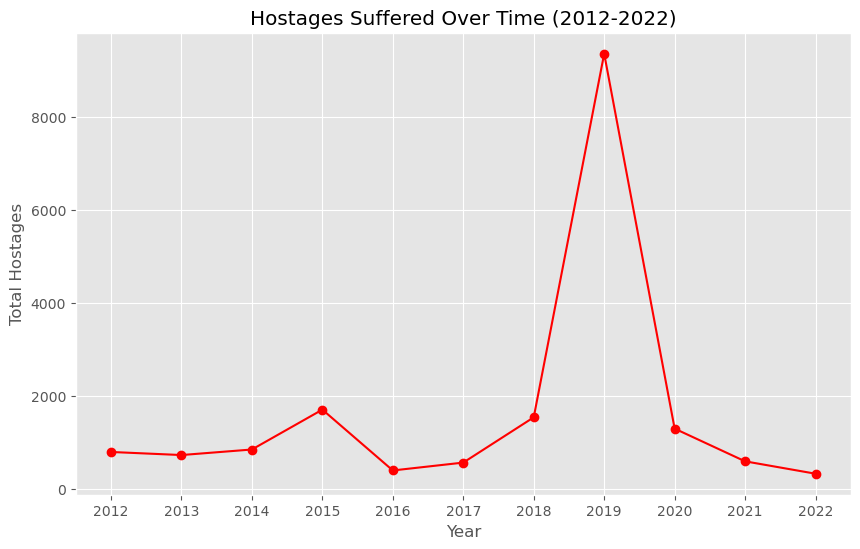

In [145]:
yearly_totals = df.groupby('Year')['Hostages'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Year'], yearly_totals['Hostages'], marker='o', linestyle='-', color='r')
plt.title('Hostages Suffered Over Time (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Hostages')
plt.xticks(yearly_totals['Year'])
plt.show()

#### In 2019, there is an abnormal increase in hostages that suffered by the act of terrorism

In [146]:
hostages_2019 = df[df['Year'] == 2019]

hostages_by_country_2019 = fatalities_2015.groupby('Country')['Hostages'].sum().reset_index()

top_5 = hostages_by_country_2019.sort_values(by='Hostages', ascending=False).head(5)

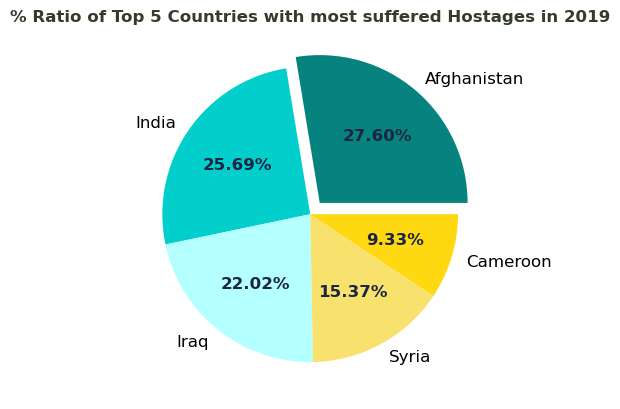

In [147]:
plt.title('% Ratio of Top 5 Countries with most suffered Hostages in 2019', fontsize=12, weight=600, color='#333d29')
wedges, texts, autotexts = plt.pie(x=top_5['Hostages'], labels=top_5['Country'], autopct='%.2f%%',
                                       textprops=dict(fontsize=12), explode=[0.1,0,0,0,0], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')

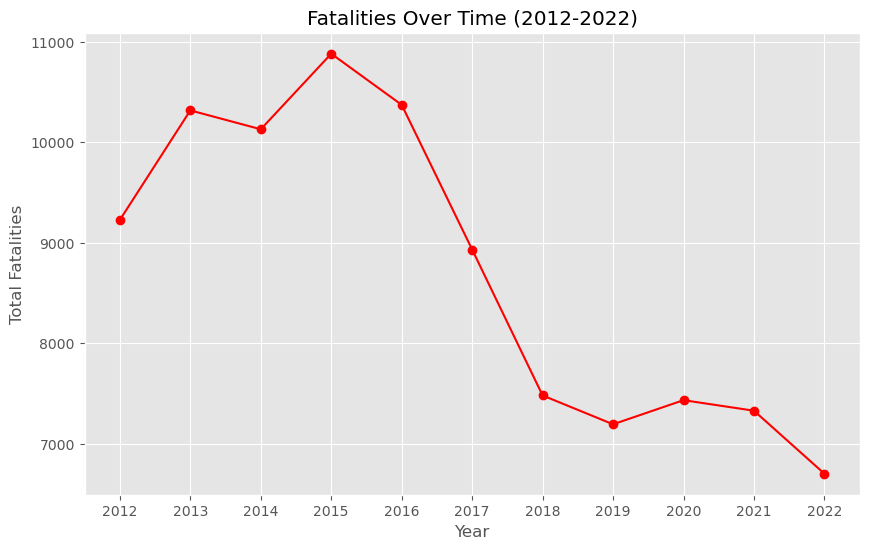

In [148]:
yearly_totals = df.groupby('Year')['Fatalities'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(yearly_totals['Year'], yearly_totals['Fatalities'], marker='o', linestyle='-', color='r')
plt.title('Fatalities Over Time (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')
plt.xticks(yearly_totals['Year'])
plt.show()

### 2015 was the year of most fatalities, so specifically analyzing 2015

In [149]:
df['Year'] = df['Year'].astype(int)

fatalities_2015 = df[df['Year'] == 2015]

fatalities_by_country_2015 = fatalities_2015.groupby('Country')['Fatalities'].sum().reset_index()

top_5 = fatalities_by_country_2015.sort_values(by='Fatalities', ascending=False).head(5)

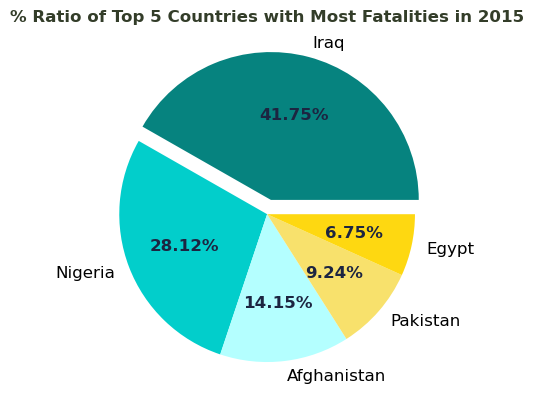

In [150]:
plt.title('% Ratio of Top 5 Countries with Most Fatalities in 2015', fontsize=12, weight=600, color='#333d29')
wedges, texts, autotexts = plt.pie(x=top_5['Fatalities'], labels=top_5['Country'], autopct='%.2f%%',
                                       textprops=dict(fontsize=12), explode=[0.1,0,0,0,0], colors=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811', '#fdc100'])

for autotext in autotexts:
    autotext.set_color('#1c2541')
    autotext.set_weight('bold')